# Analyzing the results of instrumentation

The dataset was obtained by running a script to automatically execute the solvers with a combination of input variables.

All combinations of the following variables are present:
- Puzzle (9x9_101, 9x9_102, ...)
- Unassigned position (full, half, quarter)
- Algorithm (BFS, DLX, CP)

And the following metrics were measured on each run:

- methods
- basic_blocks
- instructions
- field_load
- field_store
- regular_load
- regular_store
- new
- newarray
- anewarray
- multianewarray
- time (independently from the rest)

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 99999)

dynamic = pd.read_csv('./all/dynamic.csv')
loadstore = pd.read_csv('./all/loadstore.csv')
alloc = pd.read_csv('./all/alloc.csv')
time = pd.read_csv('./all/time.csv')

df = pd.concat([dynamic,loadstore,alloc,time],axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(['name'], axis=1)

In [2]:
df

,algorithm,size,un,methods,basic_blocks,instructions,instructions_per_basic_block,instructions_per_method,basic_blocks_per_method,field_load,field_store,regular_load,regular_store,new,newarray,anewarray,multianewarray,time
0,BFS,9,81,767,119982468,279979992,2.333508,365032.584094,156430.857888,2726,20,40019093,39989031,35,0,2,1,2431
1,BFS,9,81,767,119982468,279979992,2.333508,365032.584094,156430.857888,2726,20,40019093,39989031,35,0,2,1,2234
2,BFS,9,81,981,173796110,405551768,2.333492,413406.491335,177162.191641,3360,20,57965376,57925165,35,0,2,1,3499
3,BFS,9,81,639,85577397,199697943,2.333536,312516.342723,133923.938967,2409,20,28545957,28521718,35,0,2,1,1718
4,BFS,9,81,723,109396213,255277443,2.333513,353080.834025,151308.731674,2601,20,36488656,36460632,35,0,2,1,2216
5,BFS,16,256,2447,465827081,1087036305,2.333562,444232.245607,190366.604414,15174,20,155398060,155250943,42,0,2,1,9358
6,BFS,16,256,4859,1105432729,2579559672,2.333529,530882.830212,227502.105166,28611,20,368731913,368425893,42,0,2,1,22107
7,BFS,16,256,3431,726078072,1694329786,2.333537,493829.724862,211622.871466,19905,20,242198375,241991069,42,0,2,1,14549
8,BFS,16,256,2896,586692577,1369079728,2.333556,472748.524862,202587.215815,18365,20,195714631,195533689,42,0,2,1,11701
9,BFS,25,625,3392,529338210,1235227851,2.333532,364159.154186,156054.896816,14516,20,176570996,176421065,51,0,2,1,10590


In [3]:
df = df.drop(['anewarray', 'multianewarray'], axis=1)

In [4]:
bfs = df.loc[df['algorithm'] == 'BFS']
dlx = df.loc[df['algorithm'] == 'DLX']
cp = df.loc[df['algorithm'] == 'CP']

In [5]:
df_9 = df.loc[df['size'] == 9]
df_16 = df.loc[df['size'] == 16]
df_25 = df.loc[df['size'] == 25]

bfs_9 = bfs.loc[bfs['size'] == 9]
bfs_16 = bfs.loc[bfs['size'] == 16]
bfs_25 = bfs.loc[bfs['size'] == 25]

dlx_9 = dlx.loc[dlx['size'] == 9]
dlx_16 = dlx.loc[dlx['size'] == 16]
dlx_25 = dlx.loc[dlx['size'] == 25]

cp_9 = cp.loc[cp['size'] == 9]
cp_16 = cp.loc[cp['size'] == 16]
cp_25 = cp.loc[cp['size'] == 25]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

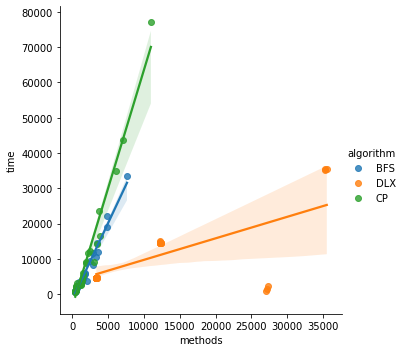

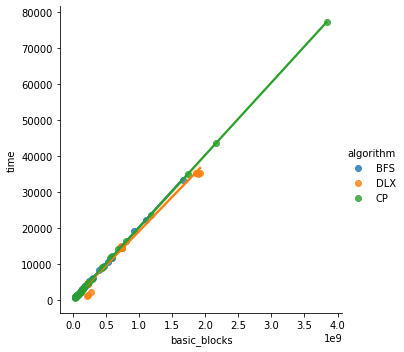

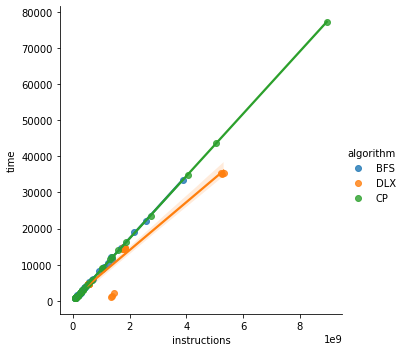

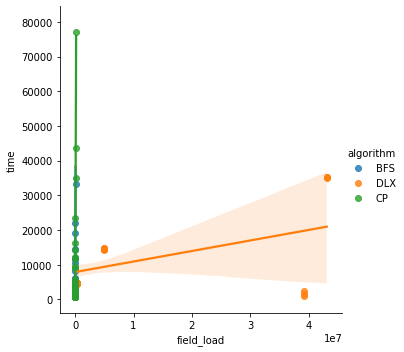

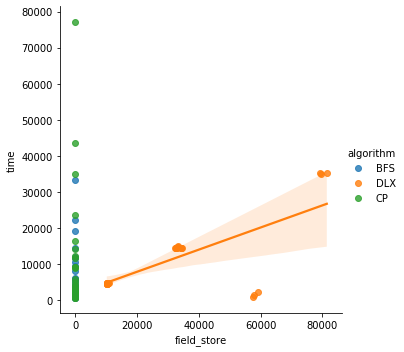

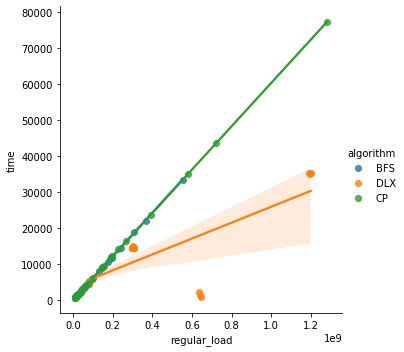

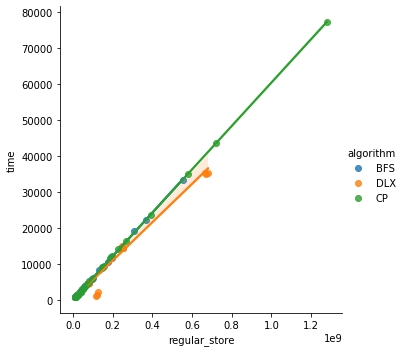

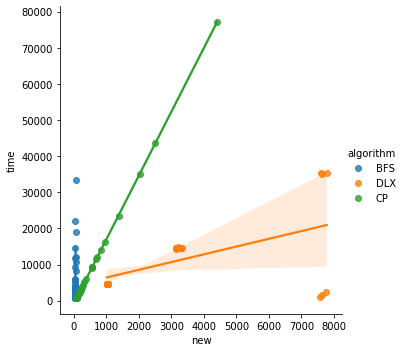

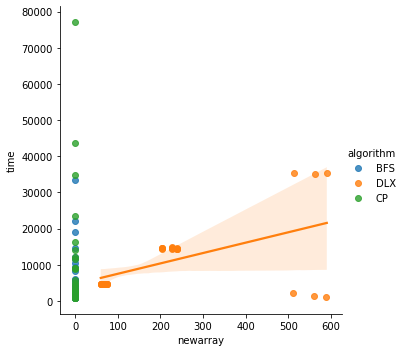

In [7]:
sns.lmplot( x='methods', y='time', data=df, hue='algorithm')
sns.lmplot( x='basic_blocks', y='time', data=df, hue='algorithm')
sns.lmplot( x='instructions', y='time', data=df, hue='algorithm')
sns.lmplot( x='field_load', y='time', data=df, hue='algorithm')
sns.lmplot( x='field_store', y='time', data=df, hue='algorithm')
sns.lmplot( x='regular_load', y='time', data=df, hue='algorithm')
sns.lmplot( x='regular_store', y='time', data=df, hue='algorithm')
sns.lmplot( x='new', y='time', data=df, hue='algorithm')
sns.lmplot( x='newarray', y='time', data=df, hue='algorithm')

**All metrics in the order of 10^9 bring too much overhead.**  
Without considering overhead, the best metrics seem the number of basic blocks and the number of instructions. With much lower overhead is the number of methods, albeit not as good.

For comparison purposes, a 16x16 puzzle was ran with CP and its time was measured.

No instrumentation: ~9125ms  
Counting methods: ~9225ms  
Counting basic blocks: ~17371ms  

Counting the number of methods adds 1% overhead, while counting the number of basic blocks counts adds 90% overhead.

While it is not a perfect fit for DLX, the other two algorithms can be estimated pretty well.

**So we conclude that the metric that is viable for the three algorithms is the number of methods.**

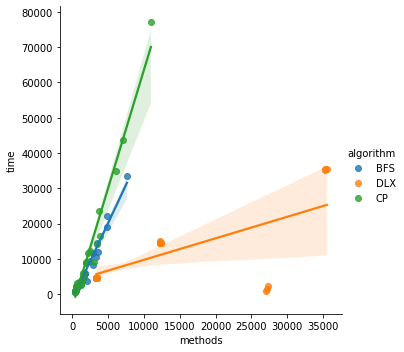

In [8]:
sns.lmplot( x='methods', y='time', data=df, hue='algorithm')

The goal is now to be able to estimate time when given the algorithm and the number of methods.

In [9]:
from sklearn.linear_model import LinearRegression

bfs_time_reg = LinearRegression().fit(bfs['methods'].to_numpy().reshape(-1, 1), bfs['time'].to_numpy())
bfs_time_r2 = bfs_time_reg.score(bfs['methods'].to_numpy().reshape(-1, 1), bfs['time'].to_numpy())
bfs_time_m = bfs_time_reg.coef_[0]
bfs_time_b = bfs_time_reg.intercept_

dlx_time_reg = LinearRegression().fit(dlx['methods'].to_numpy().reshape(-1,1), dlx['time'].to_numpy())
dlx_time_r2 = dlx_time_reg.score(dlx['methods'].to_numpy().reshape(-1,1), dlx['time'].to_numpy())
dlx_time_m = dlx_time_reg.coef_[0]
dlx_time_b = dlx_time_reg.intercept_

cp_time_reg = LinearRegression().fit(cp['methods'].to_numpy().reshape(-1, 1), cp['time'])
cp_time_r2 = cp_time_reg.score(cp['methods'].to_numpy().reshape(-1, 1), cp['time'])
cp_time_m = cp_time_reg.coef_[0]
cp_time_b = cp_time_reg.intercept_

The following values are the linear regressions that were obtained.

In [10]:
print('BFS(methods)->time (R2 = {acc:.2f}%): y = {m:.2f}x {b:+.0f}'.format(acc = bfs_time_r2*100, m = bfs_time_m, b = bfs_time_b))
print('DLX(methods)->time (R2 = {acc:.2f}%): y = {m:.2f}x {b:+.0f}'.format(acc = dlx_time_r2*100, m = dlx_time_m, b = dlx_time_b))
print('CP(methods)->time (R2 = {acc:.2f}%): y = {m:.2f}x {b:+.0f}'.format(acc = cp_time_r2*100, m = cp_time_m, b = cp_time_b))

BFS(methods)->time (R2 = 96.97%): y = 4.33x -1560
DLX(methods)->time (R2 = 46.02%): y = 0.61x +3608
CP(methods)->time (R2 = 96.95%): y = 6.71x -3614


### Now we plot 'un' to the chosen metric, the number of methods

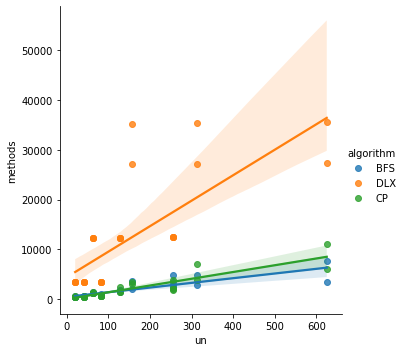

In [11]:
sns.lmplot( x='un', y='methods', data=df, fit_reg=True, hue='algorithm')

## The plan
Since the algorithms have a lot of variation between each other, it is not a good ideia to use all values together.  

Instead, the minimum heuristic and prediction will be made at the algorithm level.

#### For BFS

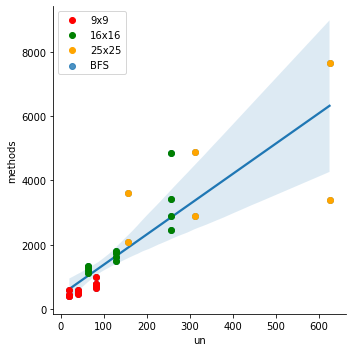

In [12]:
sns.lmplot( x='un', y='methods', data=bfs, fit_reg=True, hue='algorithm', legend_out=False)
plt.plot(bfs_9['un'], bfs_9['methods'], 'ro', label='9x9')
plt.plot(bfs_16['un'], bfs_16['methods'], 'go', label='16x16')
plt.plot(bfs_25['un'], bfs_25['methods'], color='orange', marker='o', linestyle='', label='25x25')
plt.legend()

In [94]:
bfs_reg = LinearRegression().fit(bfs['un'].to_numpy().reshape(-1, 1), bfs['methods'].to_numpy())
bfs_r2 = bfs_reg.score(bfs['un'].to_numpy().reshape(-1, 1), bfs['methods'].to_numpy())
bfs_m = bfs_reg.coef_[0]
bfs_b = bfs_reg.intercept_

In [95]:
print('BFS(un)->methods y = {m:.2f}x {b:+.0f}'.format(m = bfs_m, b = bfs_b))

BFS(un)->methods y = 9.41x +439


In [96]:
bfs_for_bfs_9_r2 = bfs_reg.score(bfs_9['un'].to_numpy().reshape(-1, 1), bfs_9['methods'].to_numpy())
bfs_for_bfs_16_r2 = bfs_reg.score(bfs_16['un'].to_numpy().reshape(-1, 1), bfs_16['methods'].to_numpy())
bfs_for_bfs_25_r2 = bfs_reg.score(bfs_25['un'].to_numpy().reshape(-1, 1), bfs_25['methods'].to_numpy())

In [97]:
print('BFS (R2 = {acc:.2f}%)'.format(acc = bfs_r2*100))
print('BFS estimating BFS 9 (R2 = {acc:.2f}%)'.format(acc = bfs_for_bfs_9_r2*100))
print('BFS estimating BFS 16 (R2 = {acc:.2f}%)'.format(acc = bfs_for_bfs_16_r2*100))
print('BFS estimating BFS 25 (R2 = {acc:.2f}%)'.format(acc = bfs_for_bfs_25_r2*100))

BFS (R2 = 74.92%)
BFS estimating BFS 9 (R2 = -319.28%)
BFS estimating BFS 16 (R2 = 65.47%)
BFS estimating BFS 25 (R2 = 19.26%)


**It does a good enough job estimating random points, but it does not fit well into any given size.**

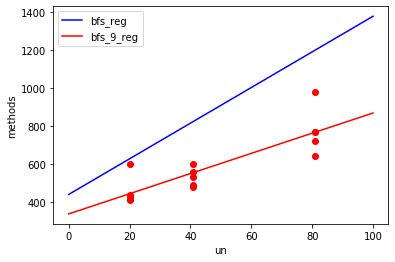

In [17]:
bfs_9_reg = LinearRegression().fit(bfs_9['un'].to_numpy().reshape(-1, 1), bfs_9['methods'].to_numpy())
bfs_9_r2 = bfs_9_reg.score(bfs_9['un'].to_numpy().reshape(-1, 1), bfs_9['methods'].to_numpy())
bfs_9_m = bfs_9_reg.coef_[0]
bfs_9_b = bfs_9_reg.intercept_

x = np.linspace(0,100,2)
y = x * bfs_m + bfs_b
y_9 = x * bfs_9_m + bfs_9_b

plt.plot(x,y, c='blue', label='bfs_reg')
plt.plot(x,y_9, c='red', label='bfs_9_reg')
plt.plot(bfs_9['un'].to_numpy(), bfs_9['methods'].to_numpy(), 'ro')
plt.xlabel('un')
plt.ylabel('methods')
plt.legend()

The intercept is not very good, but the slope is not too off. 

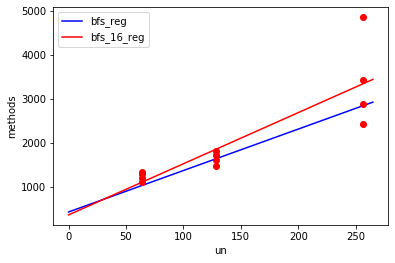

In [18]:
bfs_16_reg = LinearRegression().fit(bfs_16['un'].to_numpy().reshape(-1, 1), bfs_16['methods'].to_numpy())
bfs_16_r2 = bfs_16_reg.score(bfs_16['un'].to_numpy().reshape(-1, 1), bfs_16['methods'].to_numpy())
bfs_16_m = bfs_16_reg.coef_[0]
bfs_16_b = bfs_16_reg.intercept_

x = np.linspace(0,265,2)
y = x * bfs_m + bfs_b
y_16 = x * bfs_16_m + bfs_16_b

plt.plot(x,y, c='blue', label='bfs_reg')
plt.plot(x,y_16, c='red', label='bfs_16_reg')
plt.plot(bfs_16['un'].to_numpy(), bfs_16['methods'].to_numpy(), 'ro')
plt.xlabel('un')
plt.ylabel('methods')
plt.legend()

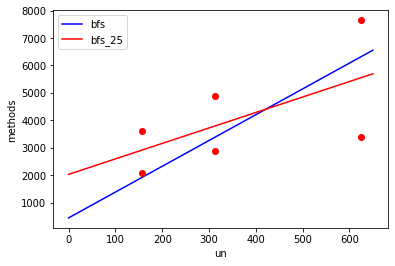

In [19]:
bfs_25_reg = LinearRegression().fit(bfs_25['un'].to_numpy().reshape(-1, 1), bfs_25['methods'].to_numpy())
bfs_25_r2 = bfs_25_reg.score(bfs_25['un'].to_numpy().reshape(-1, 1), bfs_25['methods'].to_numpy())
bfs_25_m = bfs_25_reg.coef_[0]
bfs_25_b = bfs_25_reg.intercept_

x = np.linspace(0,650,2)
y = x * bfs_m + bfs_b
y_25 = x * bfs_25_m + bfs_25_b


plt.plot(x,y, color='blue', label='bfs')
plt.plot(x,y_25, color='red', label='bfs_25')
plt.plot(bfs_25['un'].to_numpy(), bfs_25['methods'].to_numpy(), 'ro')
plt.xlabel('un')
plt.ylabel('methods')
plt.legend()

#### For DLX

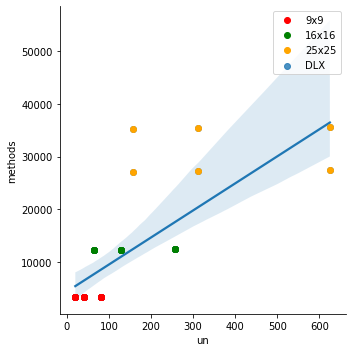

In [72]:
sns.lmplot( x='un', y='methods', data=dlx, fit_reg=True, hue='algorithm', legend_out=False)
plt.plot(dlx_9['un'], dlx_9['methods'], 'ro', label='9x9')
plt.plot(dlx_16['un'], dlx_16['methods'], 'go', label='16x16')
plt.plot(dlx_25['un'], dlx_25['methods'], color='orange', marker='o', linestyle='', label='25x25')
plt.legend()

In [73]:
dlx_reg = LinearRegression().fit(dlx['un'].to_numpy().reshape(-1,1), dlx['methods'].to_numpy())
dlx_r2 = dlx_reg.score(dlx['un'].to_numpy().reshape(-1,1), dlx['methods'].to_numpy())
dlx_m = dlx_reg.coef_[0]
dlx_b = dlx_reg.intercept_

In [74]:
print('DLX (R2 = {acc:.2f}%)'.format(acc = dlx_r2*100))
print('DLX estimating DLX 9 (R2 = {acc:.2f}%)'.format(acc = dlx_for_dlx_9_r2*100))
print('DLX estimating DLX 16 (R2 = {acc:.2f}%)'.format(acc = dlx_for_dlx_16_r2*100))
print('DLX estimating DLX 25 (R2 = {acc:.2f}%)'.format(acc = dlx_for_dlx_25_r2*100))

DLX (R2 = 56.85%)
DLX estimating DLX 9 (R2 = -3626119.45%)
DLX estimating DLX 16 (R2 = -257921.57%)
DLX estimating DLX 25 (R2 = -993.93%)


In [76]:
dlx_for_dlx_9_r2 = dlx_reg.score(dlx_9['un'].to_numpy().reshape(-1, 1), dlx_9['methods'].to_numpy())
dlx_for_dlx_16_r2 = dlx_reg.score(dlx_16['un'].to_numpy().reshape(-1, 1), dlx_16['methods'].to_numpy())
dlx_for_dlx_25_r2 = dlx_reg.score(dlx_25['un'].to_numpy().reshape(-1, 1), dlx_25['methods'].to_numpy())

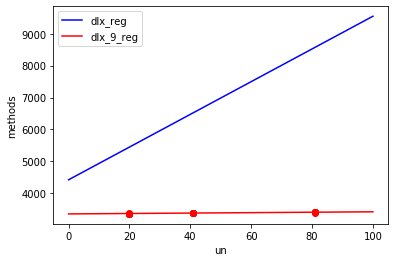

In [77]:
dlx_9_reg = LinearRegression().fit(dlx_9['un'].to_numpy().reshape(-1, 1), dlx_9['methods'].to_numpy())
dlx_9_r2 = dlx_9_reg.score(dlx_9['un'].to_numpy().reshape(-1, 1), dlx_9['methods'].to_numpy())
dlx_9_m = dlx_9_reg.coef_[0]
dlx_9_b = dlx_9_reg.intercept_

x = np.linspace(0,100,2)
y = x * dlx_m + dlx_b
y_9 = x * dlx_9_m + dlx_9_b

plt.plot(x,y, c='blue', label='dlx_reg')
plt.plot(x,y_9, c='red', label='dlx_9_reg')
plt.plot(dlx_9['un'].to_numpy(), dlx_9['methods'].to_numpy(), 'ro')
plt.xlabel('un')
plt.ylabel('methods')
plt.legend()

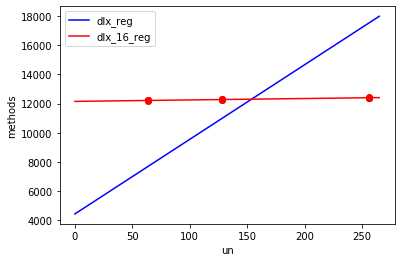

In [79]:
dlx_16_reg = LinearRegression().fit(dlx_16['un'].to_numpy().reshape(-1, 1), dlx_16['methods'].to_numpy())
dlx_16_r2 = dlx_16_reg.score(dlx_16['un'].to_numpy().reshape(-1, 1), dlx_16['methods'].to_numpy())
dlx_16_m = dlx_16_reg.coef_[0]
dlx_16_b = dlx_16_reg.intercept_

x = np.linspace(0,265,2)
y = x * dlx_m + dlx_b
y_16 = x * dlx_16_m + dlx_16_b

plt.plot(x,y, c='blue', label='dlx_reg')
plt.plot(x,y_16, c='red', label='dlx_16_reg')
plt.plot(dlx_16['un'].to_numpy(), dlx_16['methods'].to_numpy(), 'ro')
plt.xlabel('un')
plt.ylabel('methods')
plt.legend()

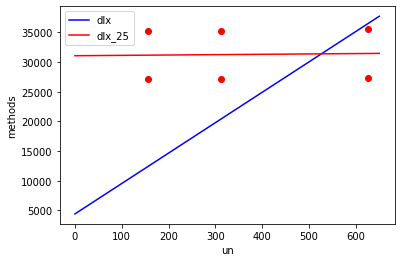

In [80]:
dlx_25_reg = LinearRegression().fit(dlx_25['un'].to_numpy().reshape(-1, 1), dlx_25['methods'].to_numpy())
dlx_25_r2 = dlx_25_reg.score(dlx_25['un'].to_numpy().reshape(-1, 1), dlx_25['methods'].to_numpy())
dlx_25_m = dlx_25_reg.coef_[0]
dlx_25_b = dlx_25_reg.intercept_

x = np.linspace(0,650,2)
y = x * dlx_m + dlx_b
y_25 = x * dlx_25_m + dlx_25_b


plt.plot(x,y, color='blue', label='dlx')
plt.plot(x,y_25, color='red', label='dlx_25')
plt.plot(dlx_25['un'].to_numpy(), dlx_25['methods'].to_numpy(), 'ro')
plt.xlabel('un')
plt.ylabel('methods')
plt.legend()

#### For CP

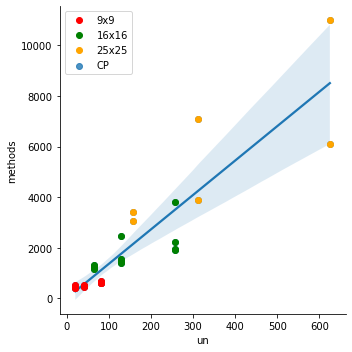

In [43]:
sns.lmplot( x='un', y='methods', data=cp, fit_reg=True, hue='algorithm', legend_out=False)
plt.plot(cp_9['un'], cp_9['methods'], 'ro', label='9x9')
plt.plot(cp_16['un'], cp_16['methods'], 'go', label='16x16')
plt.plot(cp_25['un'], cp_25['methods'], color='orange', marker='o', linestyle='', label='25x25')
plt.legend()

In [51]:
cp_reg = LinearRegression().fit(cp['un'].to_numpy().reshape(-1, 1), cp['methods'])
cp_r2 = cp_reg.score(cp['un'].to_numpy().reshape(-1, 1), cp['methods'])
cp_m = cp_reg.coef_[0]
cp_b = cp_reg.intercept_

In [28]:
cp_for_cp_9_r2 = cp_reg.score(cp_9['un'].to_numpy().reshape(-1, 1), cp_9['methods'].to_numpy())
cp_for_cp_16_r2 = cp_reg.score(cp_16['un'].to_numpy().reshape(-1, 1), cp_16['methods'].to_numpy())
cp_for_cp_25_r2 = cp_reg.score(cp_25['un'].to_numpy().reshape(-1, 1), cp_25['methods'].to_numpy())

In [53]:
print('CP (R2 = {acc:.2f}%)'.format(acc = cp_r2*100))
print('CP estimating CP 9 (R2 = {acc:.2f}%)'.format(acc = cp_for_cp_9_r2*100))
print('CP estimating CP 16 (R2 = {acc:.2f}%)'.format(acc = cp_for_cp_16_r2*100))
print('CP estimating CP 25 (R2 = {acc:.2f}%)'.format(acc = cp_for_cp_25_r2*100))

CP (R2 = 81.22%)
CP estimating CP 9 (R2 = -1324.78%)
CP estimating CP 16 (R2 = -26.12%)
CP estimating CP 25 (R2 = 50.11%)


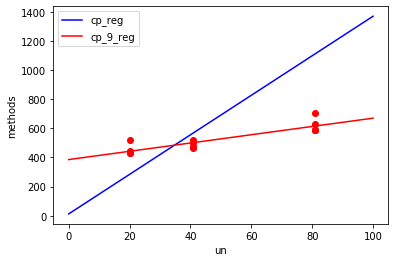

In [48]:
cp_9_reg = LinearRegression().fit(cp_9['un'].to_numpy().reshape(-1, 1), cp_9['methods'].to_numpy())
cp_9_r2 = cp_9_reg.score(cp_9['un'].to_numpy().reshape(-1, 1), cp_9['methods'].to_numpy())
cp_9_m = cp_9_reg.coef_[0]
cp_9_b = cp_9_reg.intercept_
x = np.linspace(0,100,2)
y = x * cp_m + cp_b
y_9 = x * cp_9_m + cp_9_b

plt.plot(x,y, c='blue', label='cp_reg')
plt.plot(x,y_9, c='red', label='cp_9_reg')
plt.plot(cp_9['un'].to_numpy(), cp_9['methods'].to_numpy(), 'ro')
plt.xlabel('un')
plt.ylabel('methods')
plt.legend()

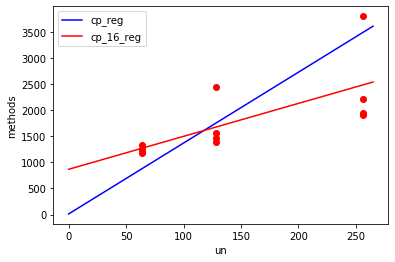

In [49]:
cp_16_reg = LinearRegression().fit(cp_16['un'].to_numpy().reshape(-1, 1), cp_16['methods'].to_numpy())
cp_16_r2 = cp_16_reg.score(cp_16['un'].to_numpy().reshape(-1, 1), cp_16['methods'].to_numpy())
cp_16_m = cp_16_reg.coef_[0]
cp_16_b = cp_16_reg.intercept_
x = np.linspace(0,265,2)
y = x * cp_m + cp_b
y_16 = x * cp_16_m + cp_16_b

plt.plot(x,y, c='blue', label='cp_reg')
plt.plot(x,y_16, c='red', label='cp_16_reg')
plt.plot(cp_16['un'].to_numpy(), cp_16['methods'].to_numpy(), 'ro')
plt.xlabel('un')
plt.ylabel('methods')
plt.legend()

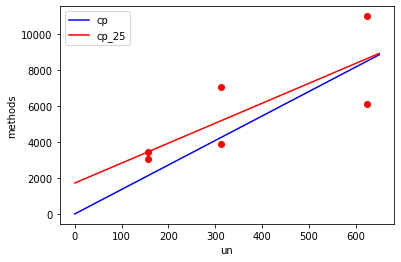

In [50]:
cp_25_reg = LinearRegression().fit(cp_25['un'].to_numpy().reshape(-1, 1), cp_25['methods'].to_numpy())
cp_25_r2 = cp_25_reg.score(cp_25['un'].to_numpy().reshape(-1, 1), cp_25['methods'].to_numpy())
cp_25_m = cp_25_reg.coef_[0]
cp_25_b = cp_25_reg.intercept_

x = np.linspace(0,650,2)
y = x * cp_m + cp_b
y_25 = x * cp_25_m + cp_25_b


plt.plot(x,y, color='blue', label='cp')
plt.plot(x,y_25, color='red', label='cp_25')
plt.plot(cp_25['un'].to_numpy(), cp_25['methods'].to_numpy(), 'ro')
plt.xlabel('un')
plt.ylabel('methods')
plt.legend()

# Conclusion

To predict the cost of an incoming request, the parameters (algorithm, size, un) are used to choose the most fitting prediction function, and the resulting value is transformed to its cost using the corresponding time function.

The most fitting prediction function is the one that has the highest R2 score for the combination of parameters. The two options are:
- The prediction function for the algorithm, using the R2 value calculated with the given size.
- The prediction function for the algorithm and the size, using the R2 value calculated with the given size.

The time function to be used is the one of the given algorithm.

----------
For example, if the incomming request has the parameters BFS, 9x9, 200:

- The BFS function estimating BFS 9x9 has an R2 score of -319.28%
- The BFS_9 function estimating BFS 9x9 has an R2 score of 72.52%

Clearly the most optimal choice is the BFS_9 function.  
(The BFS function has a very bad R2 score of -319.28%, because the intercept is wrong. If this function were to be used, the result would be an overestimation, but the it would still follow a reasonable slope)

After predicting the number of methods, the final value is calculated using BFS_time function.

### BFS

In [98]:
print('BFS(time) y = {m:.2f}x {b:+.0f}'.format(acc = bfs_time_r2*100, m = bfs_time_m, b = bfs_time_b))
print('BFS (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=bfs_r2*100, m=bfs_m, b=bfs_b))

BFS(time) y = 4.33x -1560
BFS (R2 = 74.92%) y = 9.41x +439


In [99]:
print('BFS estimating BFS 9 (R2 = {acc:.2f}%)'.format(acc = bfs_for_bfs_9_r2*100))
print('BFS_9 (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=bfs_9_r2*100, m=bfs_9_m, b=bfs_9_b))

BFS estimating BFS 9 (R2 = -319.28%)
BFS_9 (R2 = 72.52%) y = 5.33x +336


In [100]:
print('BFS estimating BFS 16 (R2 = {acc:.2f}%)'.format(acc = bfs_for_bfs_16_r2*100))
print('BFS_16 (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=bfs_16_r2*100, m=bfs_16_m, b=bfs_16_b))

BFS estimating BFS 16 (R2 = 65.47%)
BFS_16 (R2 = 74.06%) y = 11.61x +372


In [101]:
print('BFS estimating BFS 25 (R2 = {acc:.2f}%)'.format(acc = bfs_for_bfs_25_r2*100))
print('BFS_25 (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=bfs_25_r2*100, m=bfs_25_m, b=bfs_25_b))

BFS estimating BFS 25 (R2 = 19.26%)
BFS_25 (R2 = 37.31%) y = 5.64x +2026


### DLX

In [102]:
print('DLX(time) y = {m:.2f}x {b:+.0f}'.format(acc = dlx_time_r2*100, m = dlx_time_m, b = dlx_time_b))
print('DLX (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=dlx_r2*100, m=dlx_m, b=dlx_b))

DLX(time) y = 0.61x +3608
DLX (R2 = 56.85%) y = 51.23x +4423


In [103]:
print('DLX estimating DLX 9 (R2 = {acc:.2f}%)'.format(acc = dlx_for_dlx_9_r2*100))
print('DLX_9 (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=dlx_9_r2*100, m=dlx_9_m, b=dlx_9_b))

DLX estimating DLX 9 (R2 = -3626119.45%)
DLX_9 (R2 = 75.38%) y = 0.67x +3355


In [104]:
print('DLX estimating DLX 16 (R2 = {acc:.2f}%)'.format(acc = dlx_for_dlx_16_r2*100))
print('DLX_16 (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=dlx_16_r2*100, m=dlx_16_m, b=dlx_16_b))

DLX estimating DLX 16 (R2 = -257921.57%)
DLX_16 (R2 = 97.57%) y = 0.98x +12154


In [105]:
print('DLX estimating DLX 25 (R2 = {acc:.2f}%)'.format(acc = dlx_for_dlx_25_r2*100))
print('DLX_25 (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=dlx_25_r2*100, m=dlx_25_m, b=dlx_25_b))

DLX estimating DLX 25 (R2 = -993.93%)
DLX_25 (R2 = 0.08%) y = 0.60x +31075


### CP

In [106]:
print('CP(time) y = {m:.2f}x {b:+.0f}'.format(acc = cp_time_r2*100, m = cp_time_m, b = cp_time_b))
print('CP (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=cp_r2*100, m=cp_m, b=cp_b))

CP(time) y = 6.71x -3614
CP (R2 = 81.22%) y = 13.59x +12


In [107]:
print('CP estimating CP 9 (R2 = {acc:.2f}%)'.format(acc = cp_for_cp_9_r2*100))
print('CP_9 (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=cp_9_r2*100, m=cp_9_m, b=cp_9_b))

CP estimating CP 9 (R2 = -1324.78%)
CP_9 (R2 = 79.09%) y = 2.85x +386


In [108]:
print('CP estimating CP 16 (R2 = {acc:.2f}%)'.format(acc = cp_for_cp_16_r2*100))
print('CP_16 (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=cp_16_r2*100, m=cp_16_m, b=cp_16_b))

CP estimating CP 16 (R2 = -26.12%)
CP_16 (R2 = 49.09%) y = 6.32x +868


In [109]:
print('CP estimating CP 25 (R2 = {acc:.2f}%)'.format(acc = cp_for_cp_25_r2*100))
print('CP_25 (R2 = {acc:.2f}%) y = {m:.2f}x {b:+.0f}'.format(acc=cp_25_r2*100, m=cp_25_m, b=cp_25_b))

CP estimating CP 25 (R2 = 50.11%)
CP_25 (R2 = 61.71%) y = 11.07x +1726
